In [60]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mt
import matplotlib.pyplot as plt
import copy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
#import sklearn.metrics as skm
%config InlineBackend.figure_format='retina'

#import plotly as py
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
data = pd.read_csv('breast_cancer.csv')
data = data.sample(frac=1).reset_index(drop=True)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,917062,B,12.880,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.053030,...,24.37,99.31,674.7,0.1456,0.29610,0.124600,0.10960,0.2582,0.08893,NaN
1,901303,B,16.170,16.07,106.30,788.5,0.09880,0.14380,0.066510,0.053970,...,19.14,113.10,861.5,0.1235,0.25500,0.211400,0.12510,0.3153,0.08960,NaN
2,915664,B,14.810,14.70,94.66,680.7,0.08472,0.05016,0.034160,0.025410,...,17.58,101.70,760.2,0.1139,0.10110,0.110100,0.07955,0.2334,0.06142,NaN
3,857810,B,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,...,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,NaN
4,858986,M,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,...,29.51,119.10,959.5,0.1640,0.62470,0.692200,0.17850,0.2844,0.11320,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,8810955,M,14.190,23.81,92.87,610.7,0.09463,0.13060,0.111500,0.064620,...,34.85,115.00,811.3,0.1559,0.40590,0.374400,0.17720,0.4724,0.10260,NaN
565,921385,B,11.540,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.025940,...,19.68,78.78,457.8,0.1345,0.21180,0.179700,0.06918,0.2329,0.08134,NaN
566,874839,B,12.300,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.016540,...,19.59,86.65,546.7,0.1096,0.16500,0.142300,0.04815,0.2482,0.06306,NaN
567,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,26.29,68.81,366.1,0.1316,0.09473,0.020490,0.02381,0.1934,0.08988,NaN


In [4]:
# breast dataset
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,12.880,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.053030,0.1709,...,15.05,24.37,99.31,674.7,0.1456,0.29610,0.124600,0.10960,0.2582,0.08893
1,0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.066510,0.053970,0.1990,...,16.97,19.14,113.10,861.5,0.1235,0.25500,0.211400,0.12510,0.3153,0.08960
2,0,14.810,14.70,94.66,680.7,0.08472,0.05016,0.034160,0.025410,0.1659,...,15.61,17.58,101.70,760.2,0.1139,0.10110,0.110100,0.07955,0.2334,0.06142
3,0,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
4,1,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,...,17.67,29.51,119.10,959.5,0.1640,0.62470,0.692200,0.17850,0.2844,0.11320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,14.190,23.81,92.87,610.7,0.09463,0.13060,0.111500,0.064620,0.2235,...,16.86,34.85,115.00,811.3,0.1559,0.40590,0.374400,0.17720,0.4724,0.10260
565,0,11.540,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.025940,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.21180,0.179700,0.06918,0.2329,0.08134
566,0,12.300,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.016540,0.1667,...,13.35,19.59,86.65,546.7,0.1096,0.16500,0.142300,0.04815,0.2482,0.06306
567,0,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.020490,0.02381,0.1934,0.08988


In [5]:
# Features are divided by mean, standard error, and worst. We split these into separate datasets
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

In [6]:
# Making a copy of the original dataset
orig_X = copy.deepcopy(X)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.88,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.053030,0.1709,0.07253,...,15.05,24.37,99.31,674.7,0.1456,0.29610,0.124600,0.10960,0.2582,0.08893
1,16.17,16.07,106.30,788.5,0.09880,0.14380,0.066510,0.053970,0.1990,0.06572,...,16.97,19.14,113.10,861.5,0.1235,0.25500,0.211400,0.12510,0.3153,0.08960
2,14.81,14.70,94.66,680.7,0.08472,0.05016,0.034160,0.025410,0.1659,0.05348,...,15.61,17.58,101.70,760.2,0.1139,0.10110,0.110100,0.07955,0.2334,0.06142
3,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
4,14.25,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,0.07292,...,17.67,29.51,119.10,959.5,0.1640,0.62470,0.692200,0.17850,0.2844,0.11320


In [7]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
# Scaling the data 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))


In [9]:
# Create copy of the scaled data
scaled_X = copy.deepcopy(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.354249,-0.248914,-0.309710,-0.460145,1.810429,1.170425,-0.509095,0.106035,-0.374655,1.379668,...,-0.252473,-0.212873,-0.236834,-0.361925,0.580010,0.266129,-0.708059,-0.076228,-0.515677,0.276203
1,0.580158,-0.749234,0.590295,0.380003,0.173624,0.747807,-0.279842,0.130282,0.651260,0.414279,...,0.145126,-1.064546,0.173913,-0.033546,-0.388763,0.004675,-0.291634,0.159785,0.408076,0.313331
2,0.193899,-1.068042,0.110841,0.073409,-0.828386,-1.026810,-0.685995,-0.606394,-0.557202,-1.320868,...,-0.136507,-1.318583,-0.165645,-0.211623,-0.809587,-0.974344,-0.777623,-0.533787,-0.916886,-1.248287
3,-0.305966,0.004736,-0.385500,-0.363161,-1.121587,-1.259344,-1.106185,-1.154336,0.026949,-1.103975,...,-0.422281,-0.558102,-0.506991,-0.450875,-1.326851,-1.223647,-1.296979,-1.575895,-0.747019,-1.166825
4,0.034851,0.665623,0.183336,-0.026135,0.607733,1.828041,1.565613,0.970134,0.501572,1.434954,...,0.290083,0.624144,0.352628,0.138729,1.386591,2.356484,2.015015,0.972885,-0.091818,1.621144


In [10]:
# Columns for whole dataset
X.columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.199871,1.076360,-0.673149,0.628445,-0.840250,-1.287502,0.748713,-1.376516,-0.257767,-0.208261,...,0.059802,-0.073295,-0.212257,0.071855,-0.018940,0.158206,-0.064160,-0.008258,-0.019343,-0.010873
1,-0.096108,-0.129848,-1.671464,1.527477,0.403067,0.776661,-0.261687,-0.537435,-0.784358,1.002479,...,0.102367,0.019335,-0.044808,0.069086,-0.192576,0.113724,-0.052294,-0.032243,0.016206,-0.002123
2,-2.767436,-2.161049,-0.021096,1.610276,0.716379,0.033009,-0.876067,0.295924,-0.033444,0.341577,...,-0.039964,0.053949,0.077145,-0.055879,-0.004269,-0.098529,0.018105,0.012563,0.009939,-0.009230
3,-3.721459,-1.787642,1.279933,0.115566,-0.526282,0.705740,0.487807,0.297986,-0.127374,0.736912,...,0.046212,0.042237,0.070573,-0.008969,0.036871,-0.069178,0.000806,0.026295,0.004569,-0.006794
4,4.759112,3.011681,-0.166241,-0.605828,1.141701,-1.220067,0.820024,0.331033,0.528654,-0.485957,...,-0.122585,-0.017337,0.063222,0.234068,0.207742,-0.009842,-0.001135,0.096468,0.002798,0.019033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.508766,2.614648,0.206380,-1.894746,-2.124766,2.465075,-0.776710,1.523230,-0.522257,-0.290871,...,-0.135365,-0.126616,-0.090915,-0.143571,-0.091349,-0.057025,-0.062673,-0.004864,-0.005791,-0.010216
565,-1.665475,2.389618,1.502249,0.875951,0.484546,-1.189518,-0.677755,-0.146643,-0.291648,0.102733,...,0.153679,-0.024001,-0.088469,0.118001,-0.073631,-0.029530,-0.008531,-0.008804,-0.002466,-0.000091
566,-3.357304,-1.103732,0.152090,0.828188,0.734259,0.692626,-0.187749,0.316890,0.063728,-0.243251,...,0.084835,-0.134961,0.053460,-0.012707,-0.061537,0.029049,0.024553,0.017767,-0.010238,-0.008386
567,-3.904338,1.190067,1.551981,-0.935775,-0.708120,-2.354004,1.116766,-0.148583,-0.907413,-0.316787,...,-0.010253,0.091699,-0.006032,-0.064261,-0.018288,-0.031278,0.072002,-0.009350,0.002555,0.014040


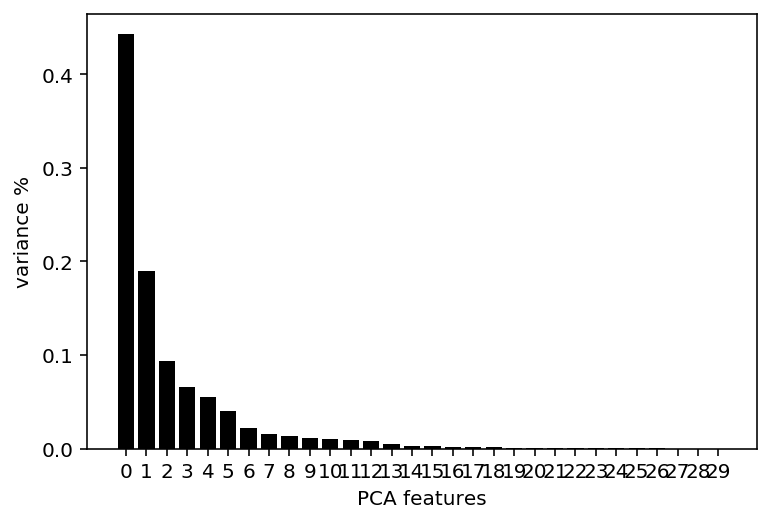

In [11]:
# Now we can perform PCA
# Create a PCA instance: pca
pca = PCA(n_components=30) #26 for heart, 10 for breast mean, 30 for all breast
principalComponents = pca.fit_transform(X)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components

This shows that the majority of variance of the data is captured in the first PC.

Text(0, 0.5, 'PCA 2')

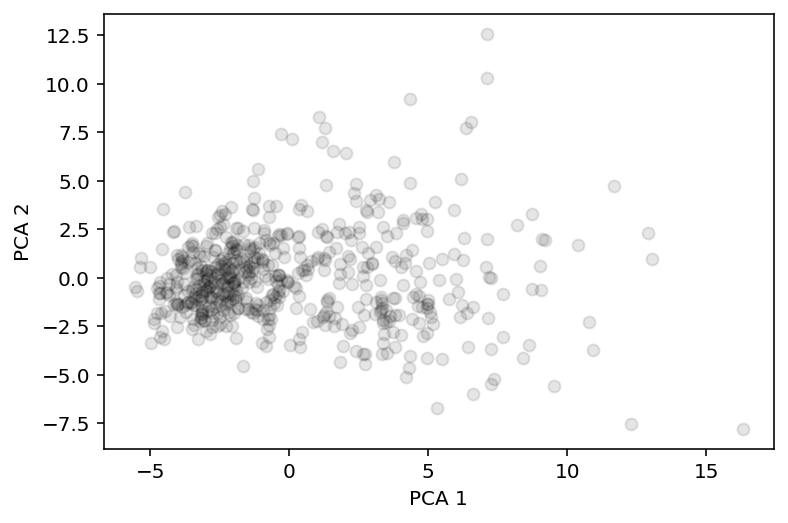

In [12]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [13]:
PCA_components.shape


(569, 30)

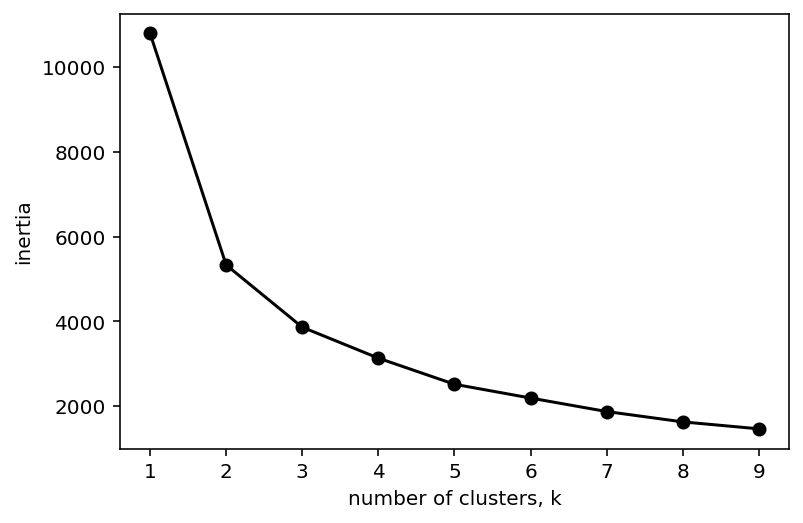

In [14]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Elbow point is when clusters = 2

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(PCA_components.iloc[:,:2])
clusters = kmeans.predict(PCA_components.iloc[:, :2])
PC1 = PCA_components.iloc[:, 0]
PC2 = PCA_components.iloc[:, 1]
PC3 = PCA_components.iloc[:, 2]
#Add the cluster vector to our DataFrame, X
X["Cluster"] = clusters
X = pd.concat([X, PC1, PC2], axis=1, join='inner')

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster,0,1
0,-0.354249,-0.248914,-0.309710,-0.460145,1.810429,1.170425,-0.509095,0.106035,-0.374655,1.379668,...,-0.361925,0.580010,0.266129,-0.708059,-0.076228,-0.515677,0.276203,0,-0.199871,1.076360
1,0.580158,-0.749234,0.590295,0.380003,0.173624,0.747807,-0.279842,0.130282,0.651260,0.414279,...,-0.033546,-0.388763,0.004675,-0.291634,0.159785,0.408076,0.313331,0,-0.096108,-0.129848
2,0.193899,-1.068042,0.110841,0.073409,-0.828386,-1.026810,-0.685995,-0.606394,-0.557202,-1.320868,...,-0.211623,-0.809587,-0.974344,-0.777623,-0.533787,-0.916886,-1.248287,0,-2.767436,-2.161049
3,-0.305966,0.004736,-0.385500,-0.363161,-1.121587,-1.259344,-1.106185,-1.154336,0.026949,-1.103975,...,-0.450875,-1.326851,-1.223647,-1.296979,-1.575895,-0.747019,-1.166825,0,-3.721459,-1.787642
4,0.034851,0.665623,0.183336,-0.026135,0.607733,1.828041,1.565613,0.970134,0.501572,1.434954,...,0.138729,1.386591,2.356484,2.015015,0.972885,-0.091818,1.621144,1,4.759112,3.011681


In [16]:
X.columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Cluster', 'PC1', 'PC2']
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Cluster', 'PC1', 'PC2'],
      dtype='object')

In [17]:
X.columns = ['radius_mean',           'texture_mean',
               'perimeter_mean',              'area_mean',
              'smoothness_mean',       'compactness_mean',
               'concavity_mean',    'concave points_mean',
                'symmetry_mean', 'fractal_dimension_mean',
                      'Cluster',                        'PC1',
                              'PC2']

ValueError: Length mismatch: Expected axis has 33 elements, new values have 13 elements

In [18]:
cluster0 = X[X["Cluster"] == 0]
cluster1 = X[X["Cluster"] == 1]

cluster0.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Cluster', 'PC1', 'PC2'],
      dtype='object')

In [19]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0['PC1'],
                    y = cluster0['PC2'],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1['PC1'],
                    y = cluster1['PC2'],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [trace1, trace2]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

NameError: name 'go' is not defined

In [20]:
# Now do regression on original, PCs, and normalized data and cross validation 

# First we want to split the data into train and val set, we'll use 2/3 of the data for training and 1/3 for validation
def split(dataset, targets, split):
    dataset = np.array(dataset)
    idx = int(len(dataset)*split)
    train_X = dataset[:idx,:]
    train_Y = targets[:idx]
    test_X = dataset[idx:, :]
    test_Y = targets[idx:]
    return train_X, train_Y, test_X, test_Y

train_X, train_Y, val_X, val_Y = split(X, Y, 2/3)
clf = LogisticRegression(random_state=0).fit(train_X, train_Y)
print(clf.score(val_X, val_Y))

0.968421052631579


C:\Users\amben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
# scaled data
train_X, train_Y, val_X, val_Y = split(scaled_X, Y, 2/3)
clf_scaled = LogisticRegression(random_state=0).fit(train_X, train_Y)
print(clf_scaled.score(val_X, val_Y))

0.9631578947368421


C:\Users\amben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
# PCs data
train_X, train_Y, val_X, val_Y = split(PCA_components, Y, 2/3)
clf_pc = LogisticRegression(random_state=0).fit(train_X, train_Y)
print(clf_pc.score(val_X, val_Y))

0.9631578947368421


C:\Users\amben\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
#scaled data confusion matrix
labels = ['benign','malignant']
y_pred_scaled = clf_scaled.predict(val_X)
scaled_cm = confusion_matrix(val_Y, y_pred_scaled)
scaled_cm

array([[82, 40],
       [38, 30]], dtype=int64)

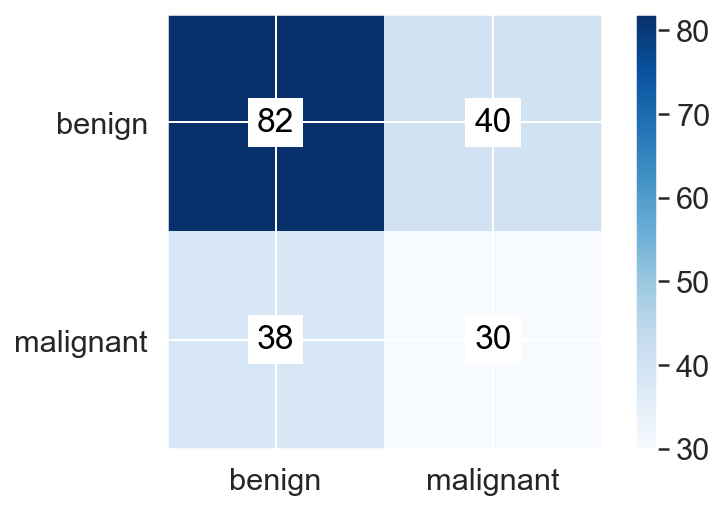

In [94]:
fig, ax = plt.subplots()

im = ax.imshow(scaled_cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=labels, 
       xticklabels=labels)

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, scaled_cm[i, j],
                       ha="center", va="center", color="black",
                      bbox=dict(facecolor='w', alpha=1.0))

# ax.yaxis.set_major_locator(ticker.IndexLocater(base=1, offset=0.5))
# should change to 
ax.yaxis.set_major_locator(mt.ticker.IndexLocator(base=1, offset=0.5))